# Modeling

In [47]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [48]:
final_df_GEO.columns

Index(['Article', 'Date', 'Heading', 'NewsType', 'Access_Timestamp',
       'Exit_Timestamp', 'Device', 'Subscribed_To_Notifications',
       'Opted_Into_Email', 'App_Installed', 'Referring_Website',
       'Follow_Up_Actions', 'Form_Submissions', 'Follows_On_Social_Media',
       'Region', 'State', 'Country', 'View_Mode', 'Breaking_News',
       'Clicked_Recommended_Article', 'Author', 'Listened_to_Audio',
       'Reached_Bottom_of_Article', 'Clicks', 'Shares', 'Comments',
       'Reactions', 'Scroll_Depth', 'Video_Views', 'Image_Interactions',
       'Bounce_Rate', 'Engagement_Score', 'Time_Spent', 'User_Age',
       'Bookmarked_Articles', 'Font_Size', 'Recency', 'Frequency',
       'Loading_Speed', 'Number_of_Ads', 'Number_of_Popups', 'Battery_Life',
       'Number_of_Images', 'Active_Tabs_While_Reading', 'desktop', 'mobile',
       'YearMonth', 'Year', 'Month', 'DayOfWeek', 'Quarter', 'Season',
       'Referring_Website_Group', 'Bounce'],
      dtype='object')

In [52]:
final_df.head(1)

,NewsType,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Follow_Up_Actions,Form_Submissions,Follows_On_Social_Media,View_Mode,Breaking_News,Clicked_Recommended_Article,Listened_to_Audio,Reached_Bottom_of_Article,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Bounce_Rate,Engagement_Score,Time_Spent,User_Age,Bookmarked_Articles,Font_Size,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Battery_Life,Number_of_Images,Active_Tabs_While_Reading,YearMonth,Year,Month,DayOfWeek,Quarter,Referring_Website_Group
0,sports,mobile,1.0,1.0,1.0,Facebook,0.0,1.0,1.0,2,0.0,1.0,1,0.0,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,0.0,10.0,16.0,32.0,29.0,17.0,124.0,33.0,3.77,3.0,5.0,75.0,6.0,13.0,2023-04,2023,4,4,2,1


In [67]:
# Fill missing values in the entire dataframe with the mean of each numeric column
final_df_filled = final_df.fillna(final_df.mean(numeric_only=True))

# Check if there are any remaining missing values
remaining_na = final_df_filled.isnull().sum().sum()


<function print(*args, sep=' ', end='\n', file=None, flush=False)>

In [70]:
final_df_filled.head(1)

,NewsType,Device,Subscribed_To_Notifications,Opted_Into_Email,App_Installed,Referring_Website,Follow_Up_Actions,Form_Submissions,Follows_On_Social_Media,View_Mode,Breaking_News,Clicked_Recommended_Article,Listened_to_Audio,Reached_Bottom_of_Article,Clicks,Shares,Comments,Reactions,Scroll_Depth,Video_Views,Image_Interactions,Bounce_Rate,Engagement_Score,Time_Spent,User_Age,Bookmarked_Articles,Font_Size,Recency,Frequency,Loading_Speed,Number_of_Ads,Number_of_Popups,Battery_Life,Number_of_Images,Active_Tabs_While_Reading,YearMonth,Year,Month,DayOfWeek,Quarter,Referring_Website_Group
0,sports,mobile,1.0,1.0,1.0,Facebook,0.0,1.0,1.0,2,0.0,1.0,1,0.0,3.0,2.0,3.0,-2.0,0.67,1.0,2.0,0.0,10.0,16.0,32.0,29.0,17.0,124.0,33.0,3.77,3.0,5.0,75.0,6.0,13.0,2023-04,2023,4,4,2,1


# Logistic Regression

In [73]:
# Ensure the target variable is binary (0 or 1)
y = final_df_filled['Reached_Bottom_of_Article'].astype(int)


# Define predictors and target variable
X = final_df_filled[['Subscribed_To_Notifications', 'Opted_Into_Email',
                     'App_Installed', 'Follow_Up_Actions', 'Form_Submissions',
                     'Follows_On_Social_Media', 'View_Mode', 'Breaking_News',
                     'Clicked_Recommended_Article', 'Listened_to_Audio', 'Clicks',
                     'Shares', 'Comments', 'Reactions', 'Scroll_Depth', 'Video_Views',
                     'Image_Interactions', 'Bounce_Rate', 'Engagement_Score',
                     'Time_Spent', 'User_Age', 'Bookmarked_Articles', 'Font_Size',
                     'Recency', 'Frequency', 'Loading_Speed', 'Number_of_Ads',
                     'Number_of_Popups', 'Battery_Life', 'Number_of_Images',
                     'Active_Tabs_While_Reading', 'Year', 'Month', 'DayOfWeek',
                     'Quarter', 'Referring_Website_Group']]

# Convert target variable to binary
y = final_df_filled['Reached_Bottom_of_Article'].astype(int)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Initialize and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Display confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.62

Confusion Matrix:
[[22320    31]
 [13665    65]]

Classification Report:
              precision    recall  f1-score   support

           0       0.62      1.00      0.77     22351
           1       0.68      0.00      0.01     13730

    accuracy                           0.62     36081
   macro avg       0.65      0.50      0.39     36081
weighted avg       0.64      0.62      0.48     36081



In [74]:
# Initialize and train the Logistic Regression model with class weights
log_reg = LogisticRegression(max_iter=1000, class_weight='balanced')
log_reg.fit(X_train, y_train)

# Make predictions on the test set
y_pred = log_reg.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate confusion matrix and classification report
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

# Print results
print(f"Accuracy: {accuracy:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)

Accuracy: 0.55

Confusion Matrix:
[[12346 10005]
 [ 6283  7447]]

Classification Report:
              precision    recall  f1-score   support

           0       0.66      0.55      0.60     22351
           1       0.43      0.54      0.48     13730

    accuracy                           0.55     36081
   macro avg       0.54      0.55      0.54     36081
weighted avg       0.57      0.55      0.56     36081



# Random Forrest

In [75]:
# Import necessary libraries
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Random Forest model
rf_model = RandomForestClassifier(
    n_estimators=100,           # Number of trees in the forest
    random_state=42,            # Random seed for reproducibility
    class_weight='balanced'     # Handle class imbalance
)

# Train the model on the training set
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)

# Generate confusion matrix and classification report
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

# Print the results
print(f"Accuracy: {accuracy_rf:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_rf)
print("\nClassification Report:")
print(class_report_rf)


Accuracy: 0.69

Confusion Matrix:
[[17258  5093]
 [ 6048  7682]]

Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.77      0.76     22351
           1       0.60      0.56      0.58     13730

    accuracy                           0.69     36081
   macro avg       0.67      0.67      0.67     36081
weighted avg       0.69      0.69      0.69     36081



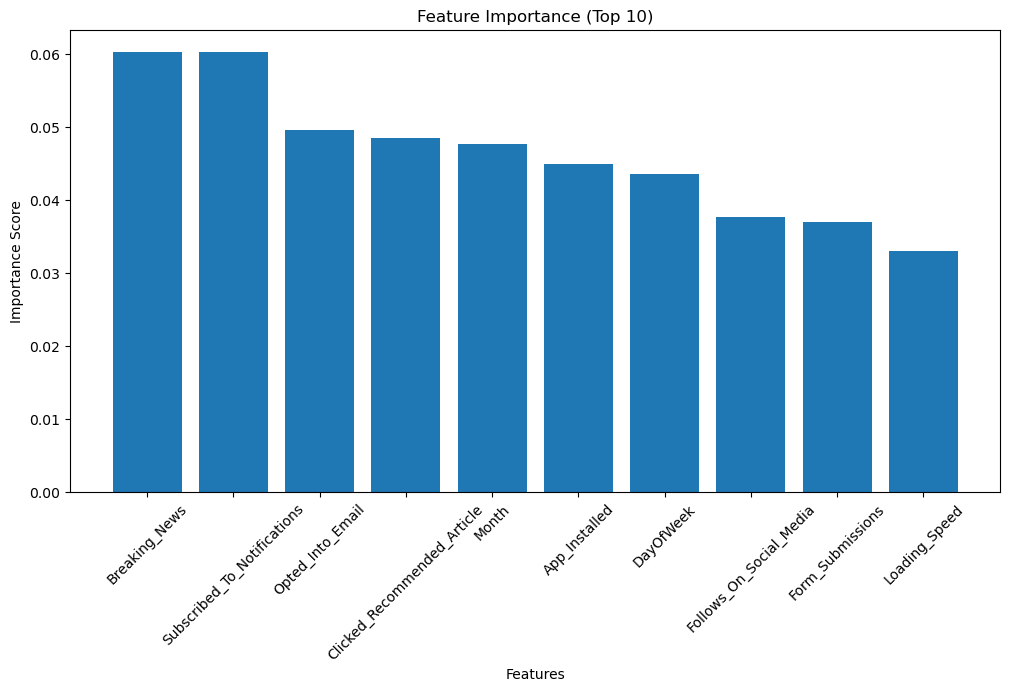

In [76]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance from the Random Forest model
feature_importances = rf_model.feature_importances_

# Create a sorted list of feature importances
sorted_indices = np.argsort(feature_importances)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
plt.title('Feature Importance (Top 10)')
plt.bar(range(10), feature_importances[sorted_indices[:10]], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices[:10]], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# Gradient Boosting

In [77]:
# Import necessary libraries
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the Gradient Boosting model
gb_model = GradientBoostingClassifier(
    n_estimators=100,           # Number of boosting stages
    learning_rate=0.1,          # Learning rate shrinks the contribution of each tree
    random_state=42             # Random seed for reproducibility
)

# Train the model on the training set
gb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test)

# Calculate accuracy
accuracy_gb = accuracy_score(y_test, y_pred_gb)

# Generate confusion matrix and classification report
conf_matrix_gb = confusion_matrix(y_test, y_pred_gb)
class_report_gb = classification_report(y_test, y_pred_gb)

# Print results
print(f"Accuracy: {accuracy_gb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_gb)
print("\nClassification Report:")
print(class_report_gb)


Accuracy: 0.69

Confusion Matrix:
[[16496  5855]
 [ 5336  8394]]

Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.74      0.75     22351
           1       0.59      0.61      0.60     13730

    accuracy                           0.69     36081
   macro avg       0.67      0.67      0.67     36081
weighted avg       0.69      0.69      0.69     36081



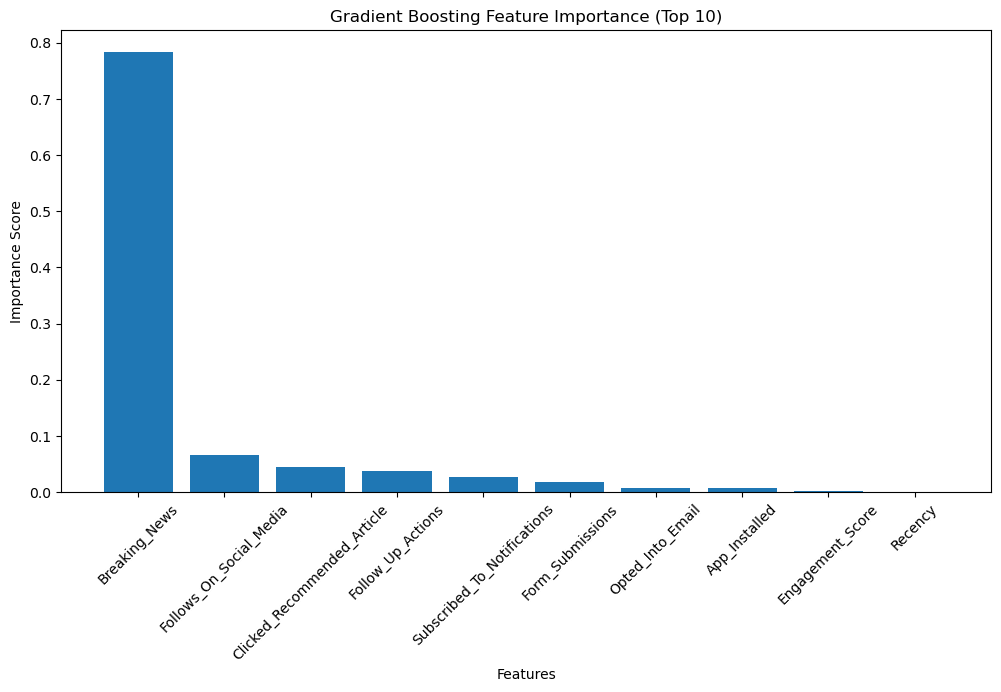

In [78]:
import matplotlib.pyplot as plt
import numpy as np

# Extract feature importance from the Gradient Boosting model
feature_importances_gb = gb_model.feature_importances_

# Create a sorted list of feature importances
sorted_indices_gb = np.argsort(feature_importances_gb)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
plt.title('Gradient Boosting Feature Importance (Top 10)')
plt.bar(range(10), feature_importances_gb[sorted_indices_gb[:10]], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices_gb[:10]], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


# XG Boost

In [80]:
# Import necessary libraries
!pip install xgboost
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialize the XGBoost model
xgb_model = XGBClassifier(
    n_estimators=100,            # Number of boosting rounds
    learning_rate=0.1,           # Step size shrinkage
    max_depth=6,                 # Maximum tree depth
    random_state=42,             # Random seed for reproducibility
    use_label_encoder=False,     # Suppress label encoding warning
    eval_metric='logloss'        # Evaluation metric
)

# Train the model on the training set
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

# Calculate accuracy
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)

# Generate confusion matrix and classification report
conf_matrix_xgb = confusion_matrix(y_test, y_pred_xgb)
class_report_xgb = classification_report(y_test, y_pred_xgb)

# Print results
print(f"Accuracy: {accuracy_xgb:.2f}")
print("\nConfusion Matrix:")
print(conf_matrix_xgb)
print("\nClassification Report:")
print(class_report_xgb)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 10.2 MB/s eta 0:00:00 0:00:01
Accuracy: 0.71

Confusion Matrix:
[[16819  5532]
 [ 4752  8978]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.75      0.77     22351
           1       0.62      0.65      0.64     13730

    accuracy                           0.71     36081
   macro avg       0.70      0.70      0.70     36081
weighted avg       0.72      0.71      0.72     36081



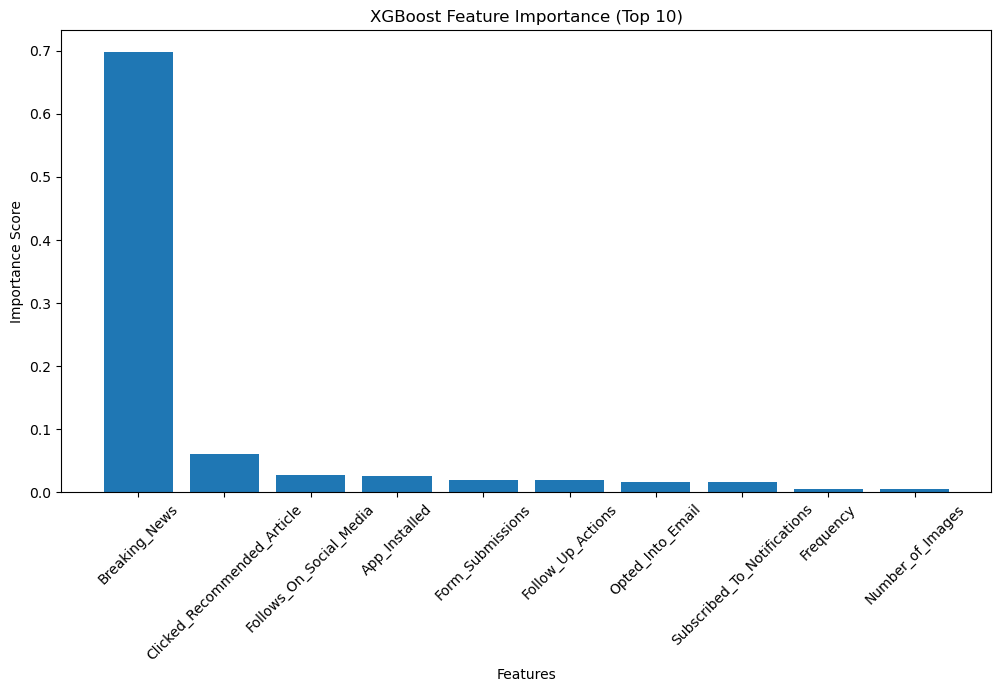

In [82]:
# Extract feature importance from the XGBoost model
feature_importances_xgb = xgb_model.feature_importances_

# Create a sorted list of feature importances
sorted_indices_xgb = np.argsort(feature_importances_xgb)[::-1]

# Plot the top 10 most important features
plt.figure(figsize=(12, 6))
plt.title('XGBoost Feature Importance (Top 10)')
plt.bar(range(10), feature_importances_xgb[sorted_indices_xgb[:10]], align='center')
plt.xticks(range(10), X_train.columns[sorted_indices_xgb[:10]], rotation=45)
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()
